# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [3]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return x**2*numpy.sin(x)

Ensure your function works with numpy arrays:

In [4]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [5]:
def g(x):
    '''Analytical integral of f(x).'''
    return 2*x*numpy.sin(x)-(x**2-2)*numpy.cos(x)-2

Check your solution with the same numpy array:

In [6]:
assert g(0) == 0.

In [7]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [8]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax)-g(xmin)

Check your analytic function:

In [9]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [10]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    a = (xmax - xmin) / N
    if N == 1:
        x = f(xmin)+f(xmax)+4*f(xmin+a/2)
    else:
        x = f(xmin) + f(xmax) + (4 * f(xmin + (N * a - a/ 2)))
        for i in range(1, N):
            x += 2 * f(xmin + i*a)
            x += 4*f(xmin+ (i * a) -a/2)
            
    return(a*1/6*(x))

Make sure you have implemented Simpson's rule correctly:

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [12]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Fractional error as number of panels is varied')

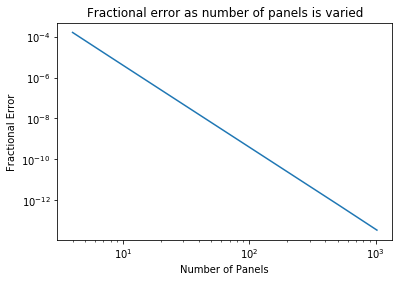

In [13]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = numpy.array([4, 8, 16, 32, 64, 128, 256, 512, 1024])  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)# Define reference value from analytical solution
result_numeric = [integrate_numeric(x0,x1,n) for n in panel_counts]
fractional_error = (numpy.abs((result_analytic-result_numeric)/result_analytic))
plt.yscale('log', basey=10 )
plt.xscale('log', basex=10 )
plt.plot(panel_counts,fractional_error)
plt.xlabel("Number of Panels")
plt.ylabel("Fractional Error")
plt.title("Fractional error as number of panels is varied")


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As the number of panels is increased, the accuracy of the numerical method increases. This is because it starts to follow the function closer and closer and hence a better approximation. If the number of panels is too large the value used for the change in x between panels ('a' in previous formula) will become very small. Not all values will be retain by the computer and in later calculations will be randomly generated. Hence this reduces the accuracy of the numerical method.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

With the trapezium rule, increasing the number of panels would increase the accuracy of the numerical method. This is because the trapeziums used will better follow the function.